## Flight Fare Prediction -- Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel('\Flight_Fare_Prediction_Data.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df.shape

(10683, 11)

In [4]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [5]:
def detail_info(data):
    temp_df = pd.DataFrame(index= data.columns)
    
    temp_df['data_type'] = data.dtypes
    temp_df['unique_val'] = data.nunique()
    temp_df['duplicate_val'] = data.duplicated().sum()
    temp_df['missing_val'] = data.isnull().sum()
    temp_df['missing_val_%'] = round(data.isnull().mean()*100,2)
    
    return temp_df

In [6]:
detail_info(df)

,data_type,unique_val,duplicate_val,missing_val,missing_val_%
Airline,object,12,220,0,0.00
Date_of_Journey,object,44,220,0,0.00
Source,object,5,220,0,0.00
Destination,object,6,220,0,0.00
Route,object,128,220,1,0.01
Dep_Time,object,222,220,0,0.00
Arrival_Time,object,1343,220,0,0.00
Duration,object,368,220,0,0.00
Total_Stops,object,5,220,1,0.01
Additional_Info,object,10,220,0,0.00


### Observation:

* There are two missing values in Route and Total_Stops features & 220 Duplicate records.

In [7]:
df[df['Route'].isnull()==True]

# Since there is only one record, we may delete the row

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [8]:
df.dropna(inplace=True)
df.reset_index(drop=True)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [9]:
df[df.duplicated()]
               

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
1685,Jet Airways,9/05/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 10 May,13h 30m,2 stops,No info,15129
1704,IndiGo,09/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,6860
1807,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,06:45,04:25 02 Jun,21h 40m,2 stops,In-flight meal not included,10919
1891,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,In-flight meal not included,10368
1971,Jet Airways,9/05/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,04:25 11 May,29h 20m,2 stops,No info,15129


In [10]:
df.drop_duplicates(keep ='first', inplace=True)
df.reset_index(drop=True)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [11]:
detail_info(df)

,data_type,unique_val,duplicate_val,missing_val,missing_val_%
Airline,object,12,0,0,0.0
Date_of_Journey,object,44,0,0,0.0
Source,object,5,0,0,0.0
Destination,object,6,0,0,0.0
Route,object,128,0,0,0.0
Dep_Time,object,222,0,0,0.0
Arrival_Time,object,1343,0,0,0.0
Duration,object,368,0,0,0.0
Total_Stops,object,5,0,0,0.0
Additional_Info,object,10,0,0,0.0


In [12]:
df.shape

(10462, 11)

In [13]:
def split_date(data, col):
    data['date'] = data[col].str.split('/').str[0]
    data['month']= data[col].str.split('/').str[1]
    data['year'] = data[col].str.split('/').str[2]
    
    data['date'] = data['date'].astype(int)
    data['month']= data['month'].astype(int)
    data['year'] = data['year'].astype(int)
    data.drop(col, axis =1, inplace=True)


In [14]:
split_date(df,'Date_of_Journey')
   

In [15]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [16]:
def extract_hours(data, col):
    data[col] =data[col].str.split(' ').str[0]
    
    data[col+'_hour'] = data[col].str.split(':').str[0]
    data[col+'_min']  = data[col].str.split(':').str[1]
    data[col+'_hour'] = data[col+'_hour'].astype(int)
    data[col+'_min']  = data[col+'_min'].astype(int)    
    
    data.drop(col, axis =1, inplace=True)   

In [17]:
extract_hours(df, 'Dep_Time')
extract_hours(df, 'Arrival_Time')

In [18]:
df.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,date,month,year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [19]:
def convert_duration(data, col):
    duration = list(data[col])
    for i in range(len(duration)):
        if len(duration[i].split(' '))==2:
            pass
        else:
            if 'h' in duration[i]:                  # Check if duration contains only hours
                duration[i] = duration[i] + ' 0m'  # Adds 0 minutes
            else:
                duration[i] ='0h '+ duration[i]    # Adds 0 hours, if only minutes available
    data[col] = duration                  
    

In [20]:
convert_duration(df, 'Duration')

In [21]:
df.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,date,month,year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,9,25,4,25


In [22]:
def extract_duration(data, col):
    data[col+'_hour'] = data[col].str.split(' ').str[0].str.replace('h','')
    data[col+'_min']  = data[col].str.split(' ').str[1].str.replace('m','')
    data[col+'_hour'] = data[col+'_hour'].astype(int)
    data[col+'_min']  = data[col+'_min'].astype(int)    
    
    data.drop(col, axis =1, inplace=True)  

In [23]:
extract_duration(df, 'Duration')

In [24]:
df.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,date,month,year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0


In [25]:
# Lets find how many flights took duration only in minutes 

df[df['Duration_hour']==0]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,date,month,year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_min
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,2 stops,No info,17327,6,3,2019,16,50,16,55,0,5


In [26]:
# It is not poassible that the flight took only 5 min to travel between Mumbai to Hyderbad

df.drop(6474, axis=0, inplace=True)
df.reset_index(drop=True)


,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,date,month,year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45
5,SpiceJet,Kolkata,Banglore,CCU → BLR,non-stop,No info,3873,24,6,2019,9,0,11,25,2,25
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,In-flight meal not included,11087,12,3,2019,18,55,10,25,15,30
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,No info,22270,1,3,2019,8,0,5,5,21,5
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,In-flight meal not included,11087,12,3,2019,8,55,10,25,25,30
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,8625,27,5,2019,11,25,19,15,7,50


In [27]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [28]:
pre_encoder_Airline = df['Airline'].value_counts()
pre_encoder_Airline

Jet Airways                          3700
IndiGo                               2043
Air India                            1693
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [29]:
df['Airline']=labelencoder.fit_transform(df['Airline'])

post_encoder_Airline = df['Airline'].value_counts()
post_encoder_Airline

4     3700
3     2043
1     1693
6     1196
8      815
10     478
0      319
2      194
7       13
5        6
11       3
9        1
Name: Airline, dtype: int64

In [30]:
df.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,date,month,year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_min
0,3,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,1,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,4,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0


In [31]:
airline_dict={}

for i,j in zip(pre_encoder_Airline.keys(), post_encoder_Airline.keys()):
    airline_dict.update({i: j})

airline_dict

{'Jet Airways': 4,
 'IndiGo': 3,
 'Air India': 1,
 'Multiple carriers': 6,
 'SpiceJet': 8,
 'Vistara': 10,
 'Air Asia': 0,
 'GoAir': 2,
 'Multiple carriers Premium economy': 7,
 'Jet Airways Business': 5,
 'Vistara Premium economy': 11,
 'Trujet': 9}

In [32]:
df.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [33]:
df.Destination.unique()

# New Delhi and Delhi should be the same

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [34]:
df['Destination'] = df['Destination'].replace("New Delhi", "Delhi")

In [35]:
df.Destination.unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [36]:
# Both Source and Destination features should have same enconding for repective cities
# sd_dict refers to Source_Destination Dictionary

sd_dict = {'Banglore':0, 'Kolkata':1, 'Delhi':2, 'Chennai':3, 'Mumbai':4,'Cochin':5, 'Hyderabad':6 }

In [37]:
df['Source'] = df['Source'].map(sd_dict)

In [38]:
df['Destination'] = df['Destination'].map(sd_dict)

In [39]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [40]:
total_stop_dict = {'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4}

In [41]:
df['Total_Stops']=df['Total_Stops'].map(total_stop_dict)

In [42]:
df.Additional_Info.unique()

# 'No info' and 'No Info' should be same category

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [43]:
df['Additional_Info'] = df['Additional_Info'].replace('No Info', 'No info')

In [44]:
df.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [45]:
pre_encoder_Additional_Info = df['Additional_Info'].value_counts()
pre_encoder_Additional_Info

No info                         8184
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [46]:
df['Additional_Info']=labelencoder.fit_transform(df['Additional_Info'])

post_encoder_Additional_Info = df['Additional_Info'].value_counts()
post_encoder_Additional_Info

7    8184
5    1926
6     318
0      19
4       7
3       4
2       1
1       1
8       1
Name: Additional_Info, dtype: int64

In [47]:
Additional_Info_dict = {}

for i,j in zip(pre_encoder_Additional_Info.keys(), post_encoder_Additional_Info.keys()):
    Additional_Info_dict.update({i:j})
    
Additional_Info_dict

{'No info': 7,
 'In-flight meal not included': 5,
 'No check-in baggage included': 6,
 '1 Long layover': 0,
 'Change airports': 4,
 'Business class': 3,
 'Red-eye flight': 2,
 '1 Short layover': 1,
 '2 Long layover': 8}

In [48]:
df.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,date,month,year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_min
0,3,0,2,BLR → DEL,0,7,3897,24,3,2019,22,20,1,10,2,50
1,1,1,0,CCU → IXR → BBI → BLR,2,7,7662,1,5,2019,5,50,13,15,7,25
2,4,2,5,DEL → LKO → BOM → COK,2,7,13882,9,6,2019,9,25,4,25,19,0


In [49]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'date', 'month', 'year', 'Dep_Time_hour',
       'Dep_Time_min', 'Arrival_Time_hour', 'Arrival_Time_min',
       'Duration_hour', 'Duration_min'],
      dtype='object')

In [50]:
df.drop(['Route', 'year'], axis =1, inplace = True)
df.reset_index(drop=True)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,date,month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_min
0,3,0,2,0,7,3897,24,3,22,20,1,10,2,50
1,1,1,0,2,7,7662,1,5,5,50,13,15,7,25
2,4,2,5,2,7,13882,9,6,9,25,4,25,19,0
3,3,1,0,1,7,6218,12,5,18,5,23,30,5,25
4,3,0,2,1,7,13302,1,3,16,50,21,35,4,45
5,8,1,0,0,7,3873,24,6,9,0,11,25,2,25
6,4,0,2,1,5,11087,12,3,18,55,10,25,15,30
7,4,0,2,1,7,22270,1,3,8,0,5,5,21,5
8,4,0,2,1,5,11087,12,3,8,55,10,25,25,30
9,6,2,5,1,7,8625,27,5,11,25,19,15,7,50


In [51]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'date', 'month', 'Dep_Time_hour', 'Dep_Time_min',
       'Arrival_Time_hour', 'Arrival_Time_min', 'Duration_hour',
       'Duration_min'],
      dtype='object')

In [52]:
cols = ['date', 'month', 'Dep_Time_hour', 'Dep_Time_min', 'Arrival_Time_hour','Arrival_Time_min', 
        'Duration_hour','Duration_min','Airline','Source', 'Destination','Total_Stops', 'Additional_Info','Price']

df = df.reindex(cols, axis =1)                 

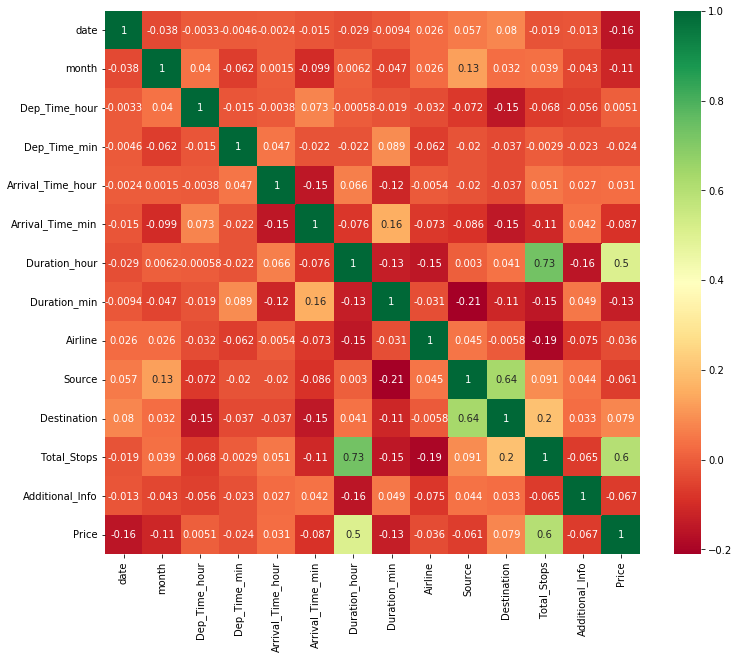

In [53]:
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [54]:
detail_info(df)

,data_type,unique_val,duplicate_val,missing_val,missing_val_%
date,int32,10,2,0,0.0
month,int32,4,2,0,0.0
Dep_Time_hour,int32,24,2,0,0.0
Dep_Time_min,int32,12,2,0,0.0
Arrival_Time_hour,int32,24,2,0,0.0
Arrival_Time_min,int32,12,2,0,0.0
Duration_hour,int32,43,2,0,0.0
Duration_min,int32,12,2,0,0.0
Airline,int32,12,2,0,0.0
Source,int64,5,2,0,0.0


In [55]:
df.drop_duplicates(keep='first', inplace=True)
df.reset_index(drop=True)

,date,month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_min,Airline,Source,Destination,Total_Stops,Additional_Info,Price
0,24,3,22,20,1,10,2,50,3,0,2,0,7,3897
1,1,5,5,50,13,15,7,25,1,1,0,2,7,7662
2,9,6,9,25,4,25,19,0,4,2,5,2,7,13882
3,12,5,18,5,23,30,5,25,3,1,0,1,7,6218
4,1,3,16,50,21,35,4,45,3,0,2,1,7,13302
5,24,6,9,0,11,25,2,25,8,1,0,0,7,3873
6,12,3,18,55,10,25,15,30,4,0,2,1,5,11087
7,1,3,8,0,5,5,21,5,4,0,2,1,7,22270
8,12,3,8,55,10,25,25,30,4,0,2,1,5,11087
9,27,5,11,25,19,15,7,50,6,2,5,1,7,8625


In [56]:
for feature in df.columns:
    df[feature] = df[feature].astype('int64')

In [57]:
detail_info(df)

,data_type,unique_val,duplicate_val,missing_val,missing_val_%
date,int64,10,0,0,0.0
month,int64,4,0,0,0.0
Dep_Time_hour,int64,24,0,0,0.0
Dep_Time_min,int64,12,0,0,0.0
Arrival_Time_hour,int64,24,0,0,0.0
Arrival_Time_min,int64,12,0,0,0.0
Duration_hour,int64,43,0,0,0.0
Duration_min,int64,12,0,0,0.0
Airline,int64,12,0,0,0.0
Source,int64,5,0,0,0.0


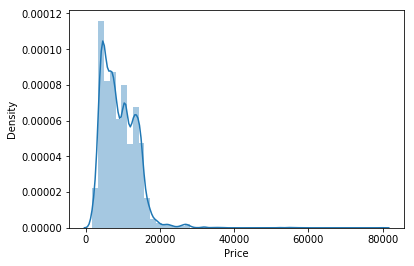

In [58]:
sns.distplot(df['Price'])

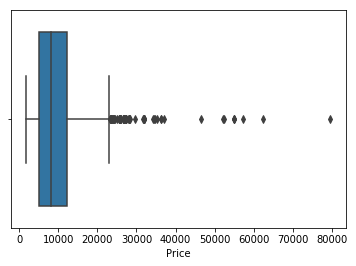

In [59]:
sns.boxplot(df['Price'])

In [60]:
len(df[df['Price']>30000])

24

In [61]:
df['Price']=np.where(df['Price']>=30000,df['Price'].median(),df['Price'])


In [62]:
df.columns

Index(['date', 'month', 'Dep_Time_hour', 'Dep_Time_min', 'Arrival_Time_hour',
       'Arrival_Time_min', 'Duration_hour', 'Duration_min', 'Airline',
       'Source', 'Destination', 'Total_Stops', 'Additional_Info', 'Price'],
      dtype='object')

In [63]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state=42)

In [65]:
X_train.shape

(8367, 13)

In [66]:
X_test.shape

(2092, 13)

In [67]:
X_test.shape

(2092, 13)

In [68]:
# Important Features using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
xtr = ExtraTreesRegressor()
xtr.fit(X_train,y_train)

ExtraTreesRegressor()

In [69]:
print(xtr.feature_importances_)

[0.10058388 0.06881682 0.02777265 0.02444239 0.02521079 0.02104662
 0.1560282  0.01865548 0.13818727 0.02496516 0.01979259 0.32698926
 0.04750888]


In [70]:
print(type(xtr.feature_importances_))

<class 'numpy.ndarray'>


In [71]:
np.sort(xtr.feature_importances_)

array([0.01865548, 0.01979259, 0.02104662, 0.02444239, 0.02496516,
       0.02521079, 0.02777265, 0.04750888, 0.06881682, 0.10058388,
       0.13818727, 0.1560282 , 0.32698926])

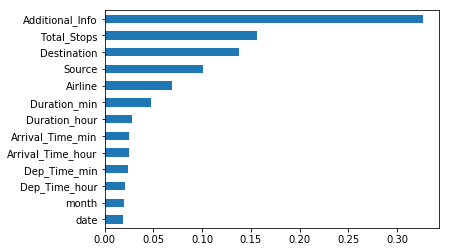

In [72]:
(pd.Series(np.sort(xtr.feature_importances_), index=X_train.columns).plot(kind='barh'))

# Addiional_Info is most important feature for dependant feature Price as it has the information of Business Class

In [73]:
X_train.columns

Index(['date', 'month', 'Dep_Time_hour', 'Dep_Time_min', 'Arrival_Time_hour',
       'Arrival_Time_min', 'Duration_hour', 'Duration_min', 'Airline',
       'Source', 'Destination', 'Total_Stops', 'Additional_Info'],
      dtype='object')

In [74]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet, RidgeCV,LassoCV,ElasticNetCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [75]:
metrics = pd.DataFrame(index=['Train_Score', 'Test_Score','CV_Score', 
                              'Train_Score_Tuned', 'Test_Score_Tuned', 
                              'MAE_Tuned', 'MSE_Tuned', 'RMSE_Tuned'],
                       columns=['LinearReg','LR_Lasso', 'LR_Ridge', 'ElasticNet','KNeighborsReg','DecisionTreeReg', 'RandomForestReg'])

In [76]:
metrics

,LinearReg,LR_Lasso,LR_Ridge,ElasticNet,KNeighborsReg,DecisionTreeReg,RandomForestReg
Train_Score,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Test_Score,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CV_Score,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Train_Score_Tuned,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Test_Score_Tuned,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MAE_Tuned,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSE_Tuned,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RMSE_Tuned,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
models = []

models.append(('LinearReg',LinearRegression()))
models.append(('LR_Lasso',Lasso()))
models.append(('LR_Ridge',Ridge()))
models.append(('ElasticNet',ElasticNet()))

models.append(('KNeighborsReg',KNeighborsRegressor()))
models.append(('DecisionTreeReg',DecisionTreeRegressor()))
models.append(('RandomForestReg',RandomForestRegressor()))

In [78]:
models

[('LinearReg', LinearRegression()),
 ('LR_Lasso', Lasso()),
 ('LR_Ridge', Ridge()),
 ('ElasticNet', ElasticNet()),
 ('KNeighborsReg', KNeighborsRegressor()),
 ('DecisionTreeReg', DecisionTreeRegressor()),
 ('RandomForestReg', RandomForestRegressor())]

In [79]:
for name, model in models:
    temp_model = model.fit(X_train, y_train)
    result = temp_model.score(X_train, y_train)
    metrics.loc['Train_Score', name] = round(result*100,4)
  
    y_pred = temp_model.predict(X_test)
    metrics.loc['Test_Score', name] = round(r2_score(y_test,y_pred)*100,4)

    cv_score = cross_val_score(model, X_train, y_train, cv = 5, n_jobs=-1, scoring ='r2')
    metrics.loc['CV_Score', name] = round(cv_score.mean()*100,4)                                       
    print(f"{name:{13}} {cv_score} {cv_score.mean():{18}} {cv_score.std():{18}}")                                         

LinearReg     [0.47640205 0.49258576 0.48156121 0.48605938 0.45685307] 0.47869229271337377 0.012146851129489105
LR_Lasso      [0.47647821 0.49258034 0.48156903 0.48599972 0.45684586] 0.4786946316555378 0.01213854115868339
LR_Ridge      [0.4764164  0.49258802 0.48155438 0.48605367 0.45684945] 0.4786923831759706 0.012147115592675452
ElasticNet    [0.41825857 0.42586628 0.41143854 0.41327403 0.3872235 ] 0.4112121865683763 0.012993486345295206
KNeighborsReg [0.62767313 0.64505669 0.62376548 0.59486063 0.63192956] 0.6246570979797308 0.01653332028372965
DecisionTreeReg [0.80748489 0.84529255 0.84327066 0.84129411 0.80633176] 0.8287347953304736 0.017869758053752426
RandomForestReg [0.87353648 0.89064154 0.89952698 0.90046145 0.89325227]  0.891483744114604 0.00970808137105028


In [80]:
metrics

,LinearReg,LR_Lasso,LR_Ridge,ElasticNet,KNeighborsReg,DecisionTreeReg,RandomForestReg
Train_Score,48.1224,48.1223,48.1224,41.3618,77.9363,99.6077,98.2969
Test_Score,47.51,47.5087,47.5106,40.8835,63.4804,80.6575,90.1271
CV_Score,47.8692,47.8695,47.8692,41.1212,62.4657,82.8735,89.1484
Train_Score_Tuned,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Test_Score_Tuned,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MAE_Tuned,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSE_Tuned,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RMSE_Tuned,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
lassocv = LassoCV(alphas = None, cv=10, max_iter = 200000, random_state=42)
lassocv.fit(X_train, y_train)

LassoCV(cv=10, max_iter=200000, random_state=42)

In [82]:
lassocv.alpha_ 

19.746845097073518

In [83]:
lasso_lr = Lasso(alpha= lassocv.alpha_)
lasso_lr.fit(X_train, y_train)
metrics.loc['Train_Score_Tuned', 'LR_Lasso'] = round(lasso_lr.score(X_train, y_train)*100,4)


In [84]:
y_pred_lasso = lasso_lr.predict(X_test)

metrics.loc['Test_Score_Tuned', 'LR_Lasso'] = round(r2_score(y_test, y_pred_lasso)*100,4)
metrics.loc['MAE_Tuned', 'LR_Lasso'] = mean_absolute_error(y_test, y_pred_lasso)
metrics.loc['MSE_Tuned', 'LR_Lasso'] = mean_squared_error(y_test, y_pred_lasso)
metrics.loc['RMSE_Tuned', 'LR_Lasso'] = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

In [85]:
metrics

,LinearReg,LR_Lasso,LR_Ridge,ElasticNet,KNeighborsReg,DecisionTreeReg,RandomForestReg
Train_Score,48.1224,48.1223,48.1224,41.3618,77.9363,99.6077,98.2969
Test_Score,47.51,47.5087,47.5106,40.8835,63.4804,80.6575,90.1271
CV_Score,47.8692,47.8695,47.8692,41.1212,62.4657,82.8735,89.1484
Train_Score_Tuned,NaN,48.102,NaN,NaN,NaN,NaN,NaN
Test_Score_Tuned,NaN,47.4654,NaN,NaN,NaN,NaN,NaN
MAE_Tuned,NaN,2338.54,NaN,NaN,NaN,NaN,NaN
MSE_Tuned,NaN,9.55754e+06,NaN,NaN,NaN,NaN,NaN
RMSE_Tuned,NaN,3091.53,NaN,NaN,NaN,NaN,NaN


In [86]:
ridgecv = RidgeCV(alphas = np.arange(.1,10,100), cv=10)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.1

In [87]:
ridge_lr = Ridge(alpha=ridgecv.alpha_)
ridge_lr.fit(X_train, y_train)
metrics.loc['Train_Score_Tuned', 'LR_Ridge'] = round(ridge_lr.score(X_train,y_train)*100,4)

In [88]:
y_pred_rg = ridge_lr.predict(X_test)

metrics.loc['Test_Score_Tuned', 'LR_Ridge'] = round(r2_score(y_test, y_pred_rg)*100,4)
metrics.loc['MAE_Tuned', 'LR_Ridge'] = mean_absolute_error(y_test, y_pred_rg)
metrics.loc['MSE_Tuned', 'LR_Ridge'] = mean_squared_error(y_test, y_pred_rg)
metrics.loc['RMSE_Tuned', 'LR_Ridge'] = np.sqrt(mean_squared_error(y_test, y_pred_rg))


In [89]:
metrics

,LinearReg,LR_Lasso,LR_Ridge,ElasticNet,KNeighborsReg,DecisionTreeReg,RandomForestReg
Train_Score,48.1224,48.1223,48.1224,41.3618,77.9363,99.6077,98.2969
Test_Score,47.51,47.5087,47.5106,40.8835,63.4804,80.6575,90.1271
CV_Score,47.8692,47.8695,47.8692,41.1212,62.4657,82.8735,89.1484
Train_Score_Tuned,NaN,48.102,48.1224,NaN,NaN,NaN,NaN
Test_Score_Tuned,NaN,47.4654,47.5101,NaN,NaN,NaN,NaN
MAE_Tuned,NaN,2338.54,2340.56,NaN,NaN,NaN,NaN
MSE_Tuned,NaN,9.55754e+06,9.54941e+06,NaN,NaN,NaN,NaN
RMSE_Tuned,NaN,3091.53,3090.21,NaN,NaN,NaN,NaN


In [90]:
# Theory Lambda = Alpha
# Thoery Alpha = l1_ratio

elastic = ElasticNetCV(alphas = None, l1_ratio= np.arange(0.1,1.1,.1), cv =10)
elastic.fit(X_train, y_train)
elastic.alpha_

19.746845097073518

In [91]:
elastic.l1_ratio_

1.0

In [92]:
elastic_lr = ElasticNet(alpha = elastic.alpha_, l1_ratio = elastic.l1_ratio_)
elastic_lr.fit(X_train, y_train)
metrics.loc['Train_Score_Tuned', 'ElasticNet'] = round(elastic_lr.score(X_train, y_train)*100,4)

In [93]:
y_pred_elastic = elastic_lr.predict(X_test)

metrics.loc['Test_Score_Tuned', 'ElasticNet'] = round(r2_score(y_test, y_pred_elastic)*100,4)
metrics.loc['MAE_Tuned', 'ElasticNet'] = mean_absolute_error(y_test, y_pred_elastic)
metrics.loc['MSE_Tuned', 'ElasticNet'] = mean_squared_error(y_test, y_pred_elastic)
metrics.loc['RMSE_Tuned', 'ElasticNet'] = np.sqrt(mean_squared_error(y_test, y_pred_elastic))

In [94]:
metrics

,LinearReg,LR_Lasso,LR_Ridge,ElasticNet,KNeighborsReg,DecisionTreeReg,RandomForestReg
Train_Score,48.1224,48.1223,48.1224,41.3618,77.9363,99.6077,98.2969
Test_Score,47.51,47.5087,47.5106,40.8835,63.4804,80.6575,90.1271
CV_Score,47.8692,47.8695,47.8692,41.1212,62.4657,82.8735,89.1484
Train_Score_Tuned,NaN,48.102,48.1224,48.102,NaN,NaN,NaN
Test_Score_Tuned,NaN,47.4654,47.5101,47.4654,NaN,NaN,NaN
MAE_Tuned,NaN,2338.54,2340.56,2338.54,NaN,NaN,NaN
MSE_Tuned,NaN,9.55754e+06,9.54941e+06,9.55754e+06,NaN,NaN,NaN
RMSE_Tuned,NaN,3091.53,3090.21,3091.53,NaN,NaN,NaN


In [95]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# KNeighbor

param_grid = {'n_neighbors': np.arange(2,25,1),
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'weights' : ['uniform', 'distance'],
              'leaf_size': [10,20,30],
              'p' : [1,2],
              'metric': ['minkowski'],
              'n_jobs' : [-1]
                }


kn_model = GridSearchCV(KNeighborsRegressor(), param_grid, cv =3, scoring='accuracy')
kn_model.fit(X_train,y_train)
kn_model.best_params_


In [ ]:
#{'algorithm': 'auto', 'leaf_size': 10, 'metric': 'minkowski', 'n_jobs': -1, 'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}# 

In [96]:
kn_model = KNeighborsRegressor(n_neighbors= 2, algorithm= 'auto', weights= 'uniform', leaf_size= 10, 
                               p =1 , metric= 'minkowski', n_jobs = -1)
kn_model.fit(X_train,y_train)
y_pred_kn = kn_model.predict(X_test)
r2_score(y_test, y_pred_kn)

0.6950139833622448

In [97]:
metrics.loc['Train_Score_Tuned', 'KNeighborsReg'] = round(kn_model.score(X_train,  y_train)*100,4)
metrics.loc['Test_Score_Tuned' , 'KNeighborsReg'] = round(r2_score(y_test,y_pred_kn)*100,4)

metrics.loc['MAE_Tuned', 'KNeighborsReg'] = mean_absolute_error(y_test, y_pred_kn)
metrics.loc['MSE_Tuned', 'KNeighborsReg'] = mean_squared_error(y_test, y_pred_kn)
metrics.loc['RMSE_Tuned', 'KNeighborsReg'] = np.sqrt(mean_squared_error(y_test, y_pred_kn))

metrics

,LinearReg,LR_Lasso,LR_Ridge,ElasticNet,KNeighborsReg,DecisionTreeReg,RandomForestReg
Train_Score,48.1224,48.1223,48.1224,41.3618,77.9363,99.6077,98.2969
Test_Score,47.51,47.5087,47.5106,40.8835,63.4804,80.6575,90.1271
CV_Score,47.8692,47.8695,47.8692,41.1212,62.4657,82.8735,89.1484
Train_Score_Tuned,NaN,48.102,48.1224,48.102,90.0492,NaN,NaN
Test_Score_Tuned,NaN,47.4654,47.5101,47.4654,69.5014,NaN,NaN
MAE_Tuned,NaN,2338.54,2340.56,2338.54,1460.28,NaN,NaN
MSE_Tuned,NaN,9.55754e+06,9.54941e+06,9.55754e+06,5.54856e+06,NaN,NaN
RMSE_Tuned,NaN,3091.53,3090.21,3091.53,2355.54,NaN,NaN


In [ ]:
# Decision Tree

param_grid = {'criterion' : ['squared_error', 'absolute_error'],
              'splitter': ['best', 'random'],
              'max_depth' : [2,4,6,8,10],
              'min_samples_leaf': np.arange(1,10,1),
              'max_features' : [2,4,6,8,10],
              'random_state' : [42]
             } 


dt_model = GridSearchCV(DecisionTreeRegressor(), param_grid, cv =5, scoring='r2')
dt_model.fit(X_train,y_train)
dt_model.best_params_

In [99]:
#{'criterion': 'squared_error', 'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 5, 'random_state': 42, 'splitter': 'best'}

In [100]:
dt_model = DecisionTreeRegressor(criterion= 'squared_error', max_depth= 10, max_features= 10, min_samples_leaf= 5, splitter = 'best', random_state=42)
dt_model.fit(X_train,y_train)
y_pred_dt = dt_model.predict(X_test)
r2_score(y_test, y_pred_dt)

0.8423923833102058

In [101]:
metrics.loc['Train_Score_Tuned', 'DecisionTreeReg'] = round(dt_model.score(X_train, y_train)*100,4)
metrics.loc['Test_Score_Tuned' , 'DecisionTreeReg'] = round(r2_score(y_test,y_pred_dt)*100,4)

metrics.loc['MAE_Tuned', 'DecisionTreeReg'] = mean_absolute_error(y_test, y_pred_dt)
metrics.loc['MSE_Tuned', 'DecisionTreeReg'] = mean_squared_error(y_test, y_pred_dt)
metrics.loc['RMSE_Tuned', 'DecisionTreeReg'] = np.sqrt(mean_squared_error(y_test, y_pred_dt))

metrics

,LinearReg,LR_Lasso,LR_Ridge,ElasticNet,KNeighborsReg,DecisionTreeReg,RandomForestReg
Train_Score,48.1224,48.1223,48.1224,41.3618,77.9363,99.6077,98.2969
Test_Score,47.51,47.5087,47.5106,40.8835,63.4804,80.6575,90.1271
CV_Score,47.8692,47.8695,47.8692,41.1212,62.4657,82.8735,89.1484
Train_Score_Tuned,NaN,48.102,48.1224,48.102,90.0492,88.8799,NaN
Test_Score_Tuned,NaN,47.4654,47.5101,47.4654,69.5014,84.2392,NaN
MAE_Tuned,NaN,2338.54,2340.56,2338.54,1460.28,992.977,NaN
MSE_Tuned,NaN,9.55754e+06,9.54941e+06,9.55754e+06,5.54856e+06,2.86733e+06,NaN
RMSE_Tuned,NaN,3091.53,3090.21,3091.53,2355.54,1693.32,NaN


In [ ]:
# Random Forest

param_grid = {'criterion' : ['squared_error', 'absolute_error'],
        'n_estimators' : [10,100,200,300],
        'max_depth' : [5,10,15,20],
        'max_features':  [5,6,7,8,9,10],
        'min_samples_leaf': [5,6,7,8,9,10],
        'oob_score' : [True,False],
        'n_jobs': [-1],
        'random_state': [42]
        }

rf_model = GridSearchCV(RandomForestRegressor(), param_grid, scoring='accuracy')
rf_model.fit(X_train,y_train)
rf_model.best_params_

In [102]:
"""{'criterion': 'squared_error', 'max_depth': 5, 'max_features': 5, 'max_leaf_nodes': 5, 'n_estimators': 10,
                 'n_jobs': -1, 'oob_score': True, 'random_state': 42}
                 
"""

"{'criterion': 'squared_error', 'max_depth': 5, 'max_features': 5, 'max_leaf_nodes': 5, 'n_estimators': 10,\n                 'n_jobs': -1, 'oob_score': True, 'random_state': 42}\n                 \n"

In [105]:
rf_model = RandomForestRegressor(criterion= 'squared_error', n_estimators= 300, max_depth= 15, max_features= 9, min_samples_leaf= 10, oob_score=False)
rf_model.fit(X_train,y_train)
y_pred_rf = rf_model.predict(X_test)
r2_score(y_test, y_pred_rf)

0.8814637774736551

In [106]:
metrics.loc['Train_Score_Tuned', 'RandomForestReg'] = round(rf_model.score(X_train, y_train)*100,4)
metrics.loc['Test_Score_Tuned' , 'RandomForestReg'] = round(r2_score(y_test,y_pred_rf)*100,4)

metrics.loc['MAE_Tuned', 'RandomForestReg'] = mean_absolute_error(y_test, y_pred_rf)
metrics.loc['MSE_Tuned', 'RandomForestReg'] = mean_squared_error(y_test, y_pred_rf)
metrics.loc['RMSE_Tuned', 'RandomForestReg'] = np.sqrt(mean_squared_error(y_test, y_pred_rf))

metrics

,LinearReg,LR_Lasso,LR_Ridge,ElasticNet,KNeighborsReg,DecisionTreeReg,RandomForestReg
Train_Score,48.1224,48.1223,48.1224,41.3618,77.9363,99.6077,98.2969
Test_Score,47.51,47.5087,47.5106,40.8835,63.4804,80.6575,90.1271
CV_Score,47.8692,47.8695,47.8692,41.1212,62.4657,82.8735,89.1484
Train_Score_Tuned,NaN,48.102,48.1224,48.102,90.0492,88.8799,89.7109
Test_Score_Tuned,NaN,47.4654,47.5101,47.4654,69.5014,84.2392,88.1464
MAE_Tuned,NaN,2338.54,2340.56,2338.54,1460.28,992.977,898.094
MSE_Tuned,NaN,9.55754e+06,9.54941e+06,9.55754e+06,5.54856e+06,2.86733e+06,2.15651e+06
RMSE_Tuned,NaN,3091.53,3090.21,3091.53,2355.54,1693.32,1468.51


In [107]:
pickle.dump(rf_model, open('FlightPrice.pkl','wb'))